<a href="https://colab.research.google.com/github/shannonwasson/Proj4/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import google.generativeai as genai

import gradio as gr
#load_dotenv()
from google.colab import userdata

api_key = userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=api_key)
generation_config = {
    'temperature' : 0,
    'top_p' : 0.95,
    'top_k' : 64,
    'max_output_tokens' : 8192,
    'response_mime_type' : 'text/plain',
}

model = genai.GenerativeModel(
  model_name="gemini-1.5-flash",
  generation_config=generation_config,
)
system_instruction = """You are a knowledgeable and empathetic AI nutritionist. You will help users create personalized diet plans tailored to their specific needs and goals.

First, you will gather information about the user's dietary restrictions, lifestyle, and fitness goals. Then, you will calculate their daily calorie needs (TDEE) and recommend a suitable macronutrient breakdown.

Next, you will generate personalized meal plans that adhere to the user's dietary restrictions and macronutrient goals. You will provide a variety of recipe suggestions to help users stay on track.

You will continuously adapt the meal plan based on user feedback and progress. Your goal is to provide a sustainable and enjoyable diet plan that helps users achieve their health and fitness objectives."""






def generate_diet_plan(user_input, chat_bot):
  try:
      history = [{'role': 'user', 'parts': [system_instruction]}]
      chat_session = model.start_chat(history=history)
      response = chat_session.send_message(user_input)
      model_response = response.text
      history.append({'role': 'user', 'parts': [user_input]})
      history.append({'role': 'system', 'parts': [model_response]})
      chat_bot = chat_bot + [[user_input, model_response]]
      return model_response, chat_bot
  except Exception as e:
      print(f"Error: {e}")
      return "An error occurred. Please try again."

iface = gr.Interface(
    fn=generate_diet_plan,
    inputs=[gr.Textbox(lines=2, placeholder="Enter your message here..."), gr.State([])],
    outputs=[gr.Textbox(lines=7), "state"],  # "state" is now in the list
    title="Diet Chatbot",
    description="Ask questions about diet, lifestyle, and meal plans. This chatbot will help you create personalized meal plans based on your needs."
)

'''iface = gr.Interface(
    fn=generate_diet_plan,
    #type="messages",
    inputs="text",
    outputs="text",
    title="Diet Chatbot",
    description="Ask questions about diet, lifestyle, and meal plans. This chatbot will help you create personalized meal plans based on your needs."
)'''

iface.launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://6552702e8cb9752a9f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://6552702e8cb9752a9f.gradio.live


# My Input:
1. lose weight while gaining muscle 2. 24 female 3. 140 pounds, 5'7", very active 4. gluten free low fodmap lactose free 5. no 6. normally eat fruit salads chicken yogurt 7. dont like fish love dark chocolate 8. minimal and am gone from a fridge for 16 hours a day

# Output from bot;

 Okay, let's work together to create a personalized nutrition plan for you.  It sounds like you have a busy lifestyle and specific dietary needs, so we'll focus on practicality and sustainability.

**1. Assessing Your Needs:**

* **Age:** 24
* **Sex:** Female
* **Height:** 5'7" (67 inches)
* **Weight:** 140 pounds
* **Activity Level:** Moderately active (work + studying, likely some light activity).  Given your 16-hour absence from home, I'll assume a moderate activity level for now. We can adjust this later based on your actual activity.
* **Goal:** Weight loss and muscle gain (this is a challenging combination, requiring a careful balance of calorie deficit and sufficient protein).
* **Dietary Restrictions:** Gluten-free, low FODMAP, lactose-free (except for the specific yogurt you mentioned).

**2. Calculating Your TDEE (Total Daily Energy Expenditure):**

Calculating your exact TDEE requires more detailed information about your activity levels (e.g., hours of intense study, walking, etc.), but we can make a reasonable estimate.  Using a moderate activity level multiplier, your Basal Metabolic Rate (BMR) plus activity will likely put your TDEE somewhere in the 1800-2000 calorie range.  We'll start with 1900 calories and adjust as needed.

**3. Macronutrient Breakdown:**

To lose weight and gain muscle, we need a balance.  I suggest the following macronutrient split (adjustments will be made based on your progress):

* **Protein:** 130-150 grams (crucial for muscle growth and satiety). This is a higher protein intake to support muscle growth while in a calorie deficit.
* **Carbohydrates:** 100-120 grams (choose low FODMAP options).  Prioritizing complex carbs will help sustain energy levels throughout your long days.
* **Fats:** 50-60 grams (healthy fats are essential for hormone production and overall health).  Focus on sources like avocados, nuts (in moderation), and olive oil.

This macronutrient breakdown equates to approximately:

* Protein: 520-600 calories
* Carbohydrates: 400-480 calories
* Fats: 450-540 calories

**4. Sample Meal Plan (Gluten-Free, Low FODMAP, Lactose-Free):**

This is a sample plan, and we'll refine it based on your feedback and progress.  Remember portion sizes are crucial to hitting your macronutrient targets.  Use a food scale to ensure accuracy.

* **Breakfast (to prepare the night before):** Overnight oats (gluten-free oats, lactose-free milk alternative, chia seeds, berries – check FODMAP tolerance for berries).  Add a scoop of protein powder if needed to meet protein goals.
* **Lunch (prepped or purchased):** Large chicken salad (made with lactose-free yogurt instead of mayo, gluten-free bread or lettuce wraps), a side of mixed greens, and a small portion of low FODMAP fruit (e.g., banana, grapes).
* **Dinner (needs planning):**  Baked salmon with roasted asparagus and quinoa (ensure quinoa is tolerated).  Or, a large chicken breast with sweet potato and steamed green beans.
* **Snacks (choose 2-3):**  A handful of almonds, lactose-free Greek yogurt, a protein bar (check ingredients for gluten and FODMAPs), hard-boiled eggs.

**5.  Addressing Your Long Days:**

Given your 16-hour workday, meal prepping is essential.  Prepare breakfasts and lunches in advance.  Pack snacks to avoid unhealthy impulse purchases.  Consider having a larger lunch to sustain you through the afternoon.

**6.  Next Steps:**

* **Track your food:** Use a food tracking app (MyFitnessPal, Lose It!) to monitor your calorie and macronutrient intake.
* **Provide feedback:** After a week, let me know how this plan is working for you.  Are you feeling satisfied?  Are you meeting your macronutrient goals?  Are there any adjustments needed?
* **Adjustments:** We'll adjust the calorie target, macronutrient ratios, and meal plan based on your progress and feedback.  We may need to increase your activity level if weight loss is slow.

Remember, consistency is key.  This is a journey, not a race.  Let's work together to make this a sustainable and enjoyable process.  Please provide feedback after a week, and we can make necessary adjustments.


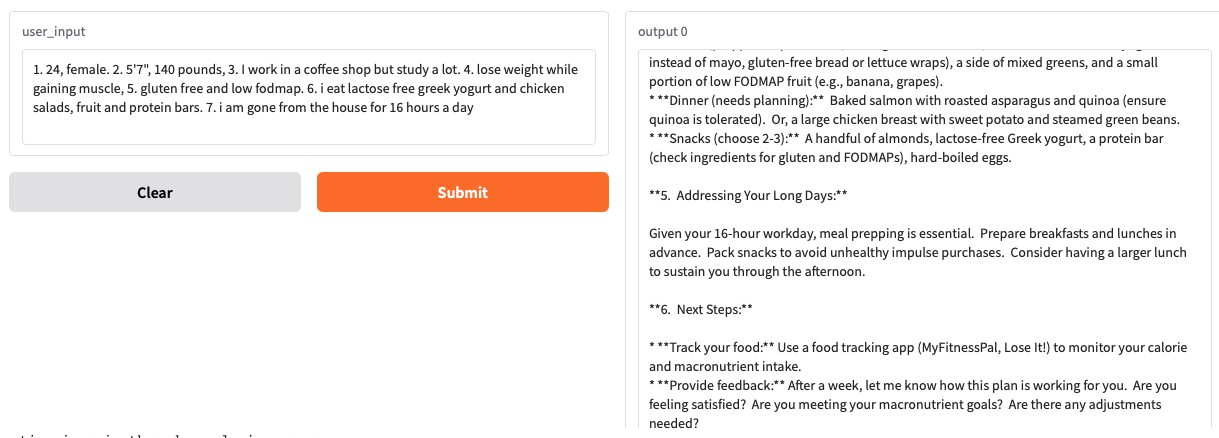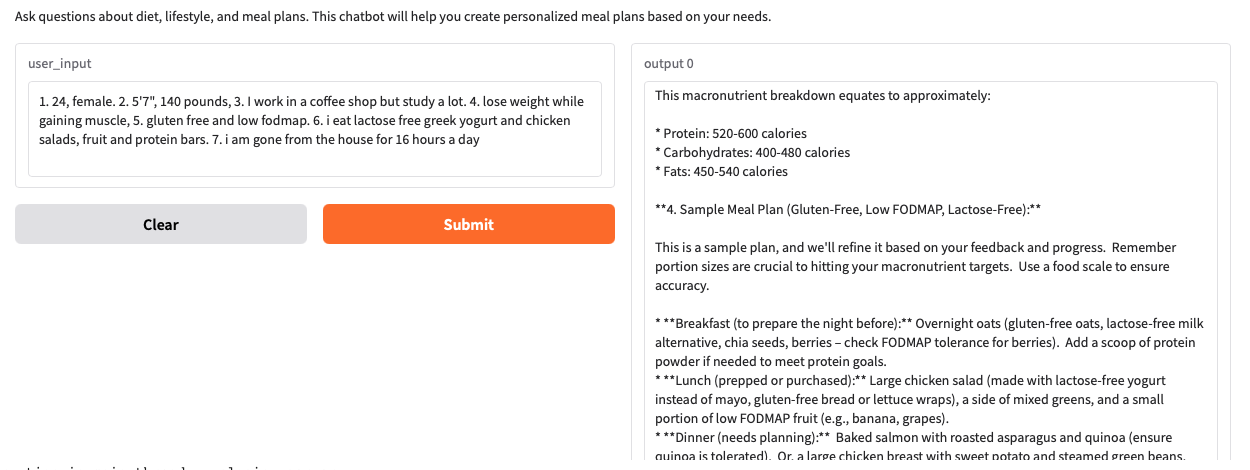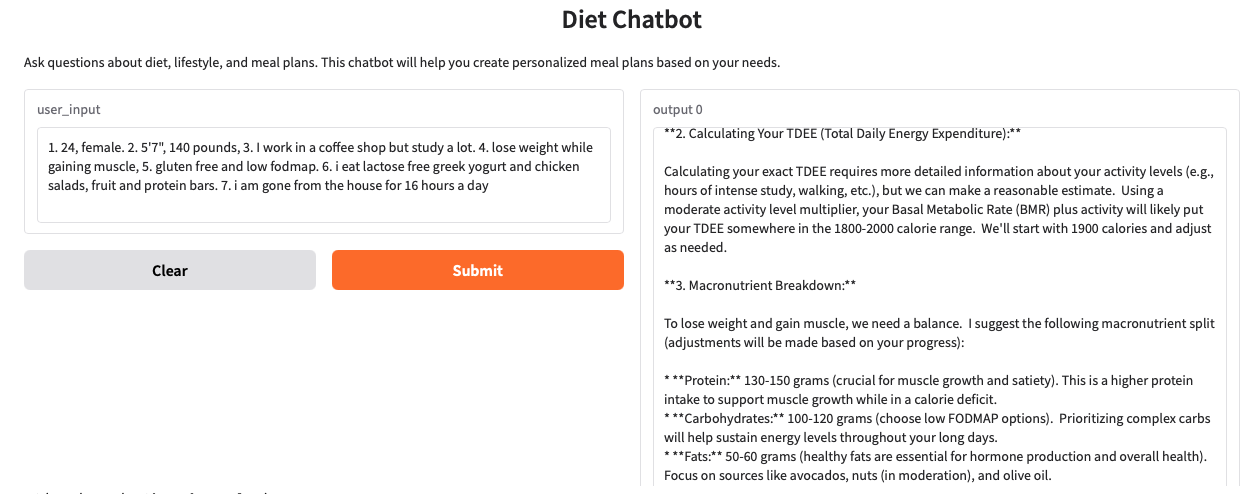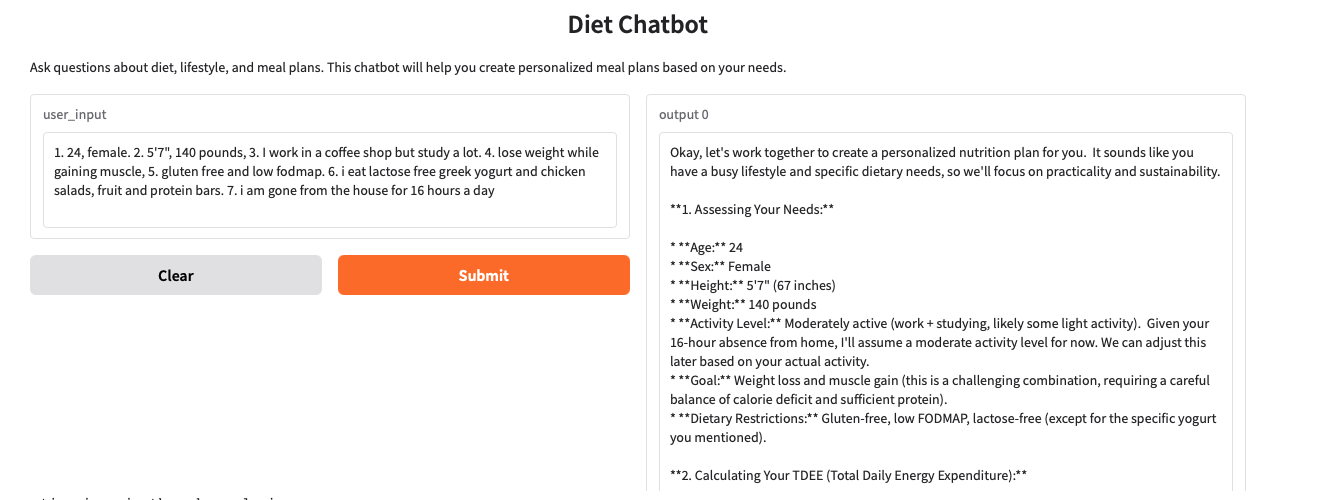